In [275]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#, confusion_matrix, ConfusionMatrixDisplay
from pickle import dump

In [276]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [278]:
data.duplicated().any()

np.False_

In [279]:
data.isnull().any().any()

np.False_

In [280]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [281]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
12           140      82             43             325      39.2  0.528                     58   1          1
             121      78             17             0        26.5  0.259                     62   0          1
             106      80             0              0        23.6  0.137                     44   0          1
             100      84             33             105      30.0  0.488                     46   0          1
             92       62             7              258      27.6  0.926                     44   1          1
                                                                                                            ..
0            78       88             29             40       36.9  0.434                     21   0          1
             74       52             10             36       27.8  0.269                     22   0          1
      

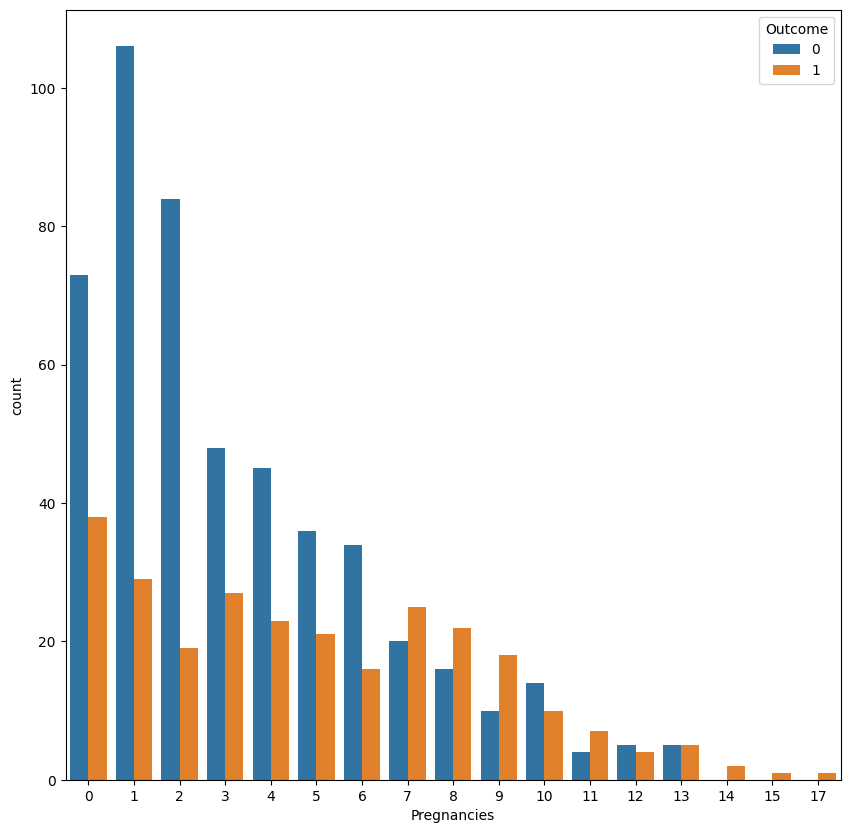

In [282]:
# Countplot of pregnancies and outcome

plt.figure(figsize=(10,10))

sns.countplot(data=data, x='Pregnancies', hue='Outcome')

plt.show()

In [283]:
data['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

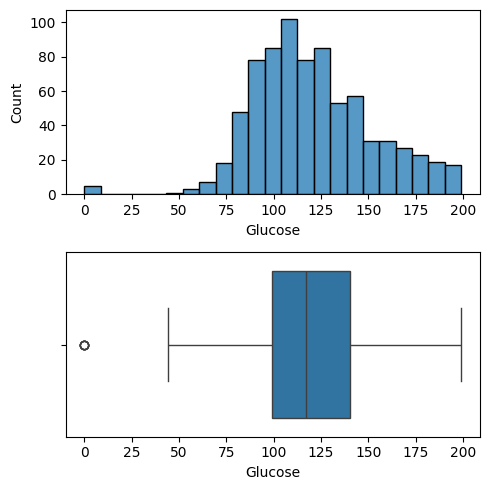

In [284]:
# Plotting glucose

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='Glucose')
sns.boxplot(ax=axis[1], data=data, x='Glucose')

plt.tight_layout()
plt.show()

In [285]:
data[data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [286]:
# Checking for coincidence between glucose and insulin being zero

data[(data['Glucose'] == 0) | (data['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [287]:
data[(data['Glucose'] == 0) & (data['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [288]:
# How does glucose being zero coincide with postive for diabetes?

data[(data['Glucose'] == 0) & (data['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


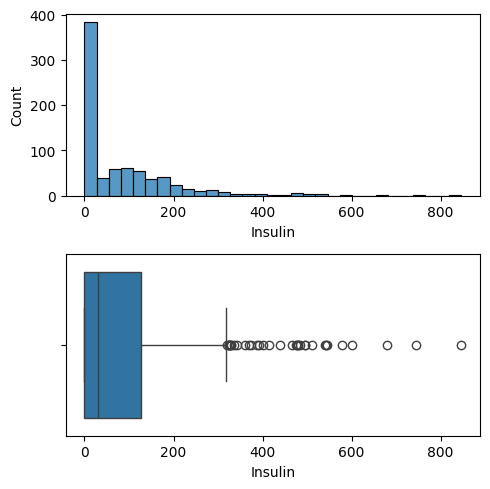

In [289]:
# Plotting insulin

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='Insulin')
sns.boxplot(ax=axis[1], data=data, x='Insulin')

plt.tight_layout()
plt.show()

In [290]:
# How do the upper outliers coincide with the outcome?

len(data[(data['Insulin'] > 200) & (data['Outcome'] == 0)])

39

In [291]:
len(data[(data['Insulin'] > 200) & (data['Outcome'] == 1)])

46

In [292]:
# How does insulin being zero coincide with postive for diabetes?

len(data[data['Insulin'] == 0])

374

In [293]:
len(data[(data['Insulin'] == 0) & (data['Outcome'] == 0)])

236

In [294]:
len(data[(data['Insulin'] == 0) & (data['Outcome'] == 1)])

138

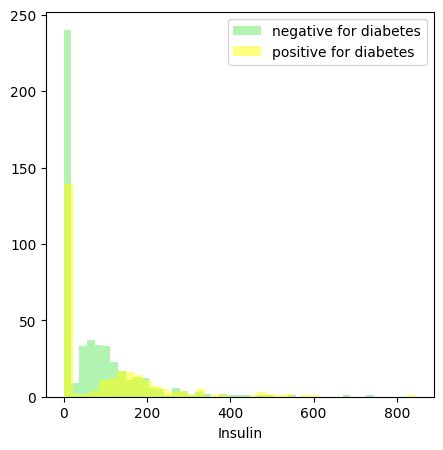

In [295]:
# Histograms of insulin for both outcomes

negative_outcome = data[data['Outcome'] == 0]
positve_outcome = data[data['Outcome'] == 1]

plt.figure(figsize=(5,5))

plt.hist(negative_outcome['Insulin'], bins=40, alpha=0.7, color='lightgreen', label='negative for diabetes')
plt.hist(positve_outcome['Insulin'], bins=40, alpha=0.5, color='yellow', label='positive for diabetes')

plt.xlabel('Insulin')

plt.legend()

plt.show()

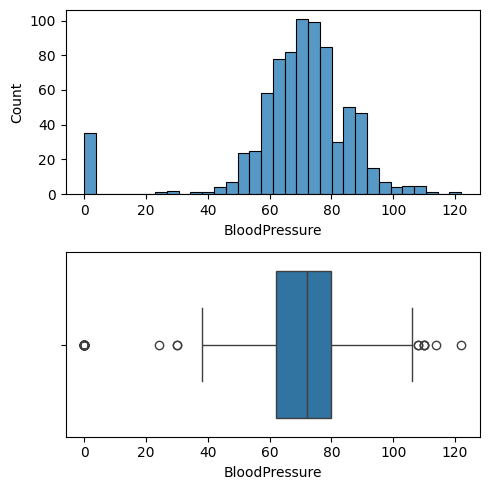

In [296]:
# Plotting blood pressure

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='BloodPressure')
sns.boxplot(ax=axis[1], data=data, x='BloodPressure')

plt.tight_layout()
plt.show()

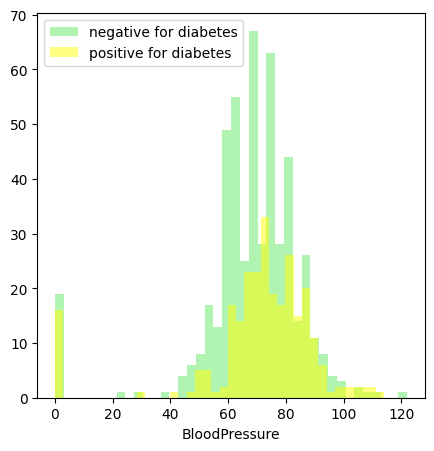

In [297]:
# Histograms of blood pressure for both outcomes

plt.figure(figsize=(5,5))

plt.hist(negative_outcome['BloodPressure'], bins=40, alpha=0.7, color='lightgreen', label='negative for diabetes')
plt.hist(positve_outcome['BloodPressure'], bins=40, alpha=0.5, color='yellow', label='positive for diabetes')

plt.xlabel('BloodPressure')

plt.legend()

plt.show()

In [298]:
data['BloodPressure'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BloodPressure, Length: 768, dtype: bool

In [299]:
# Checking these zero bp against other zeros

data[(data['BloodPressure'] == 0) & (data['SkinThickness'] == 0) & (data['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1


In [300]:
# Dropping these rows with zeros for three variables

data = data[(data['BloodPressure'] != 0) & (data['SkinThickness'] != 0) & (data['Insulin'] != 0)]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [301]:
# Resetting the filtered dataframes for outcome

negative_outcome = data[data['Outcome'] == 0]
positive_outcome = data[data['Outcome'] == 1]

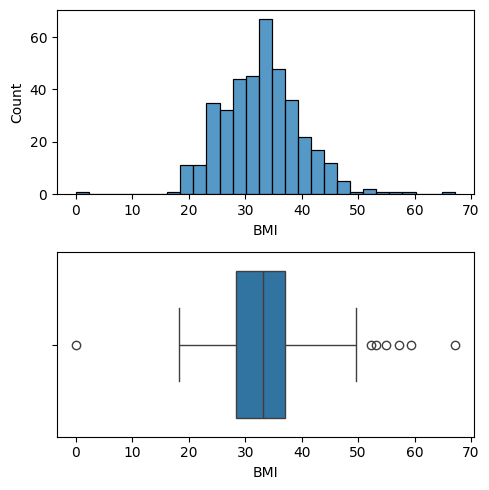

In [302]:
# Plotting BMI

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='BMI')
sns.boxplot(ax=axis[1], data=data, x='BMI')

plt.tight_layout()
plt.show()

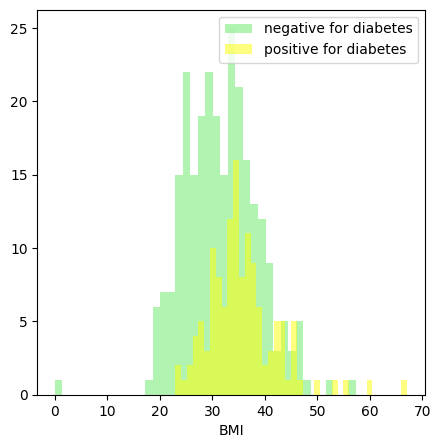

In [303]:
# Histograms of BMI for both outcomes

plt.figure(figsize=(5,5))

plt.hist(negative_outcome['BMI'], bins=40, alpha=0.7, color='lightgreen', label='negative for diabetes')
plt.hist(positive_outcome['BMI'], bins=40, alpha=0.5, color='yellow', label='positive for diabetes')

plt.xlabel('BMI')

plt.legend()

plt.show()

In [304]:
data[data['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
371,0,118,64,23,89,0.0,1.731,21,0


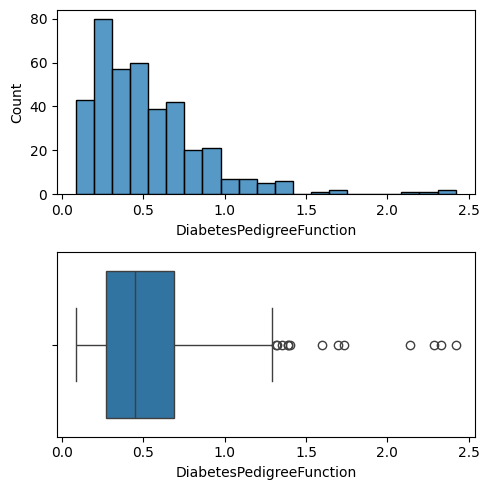

In [305]:
# Plotting DiabetesPedigreeFunction

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[1], data=data, x='DiabetesPedigreeFunction')

plt.tight_layout()
plt.show()

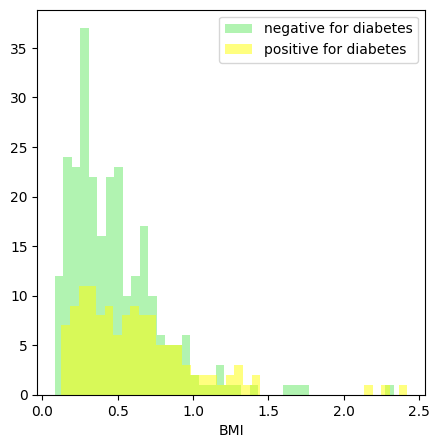

In [306]:
# Histograms of DiabetesPedigreeFunction for both outcomes

plt.figure(figsize=(5,5))

plt.hist(negative_outcome['DiabetesPedigreeFunction'], bins=40, alpha=0.7, color='lightgreen', label='negative for diabetes')
plt.hist(positive_outcome['DiabetesPedigreeFunction'], bins=40, alpha=0.5, color='yellow', label='positive for diabetes')

plt.xlabel('BMI')

plt.legend()

plt.show()

In [307]:
data['SkinThickness'].value_counts()

SkinThickness
32    20
30    18
23    17
33    17
18    16
26    14
27    14
29    14
28    13
41    12
25    12
39    12
19    12
15    11
37    11
35    11
17    10
40    10
13    10
22     9
42     9
36     9
24     8
31     8
34     8
20     8
21     8
46     7
12     6
14     6
45     6
11     5
43     5
16     5
48     4
47     4
44     4
38     3
49     3
50     3
10     3
7      2
52     2
60     1
56     1
51     1
8      1
63     1
Name: count, dtype: int64

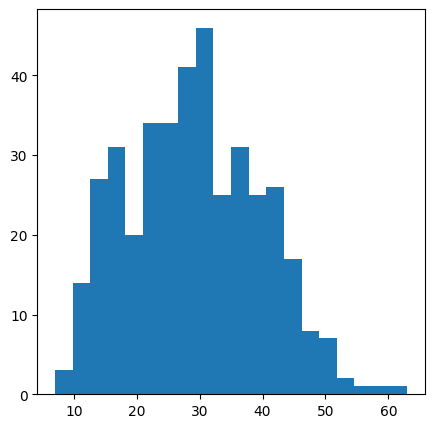

In [308]:
# Histogram of skin thickness (zeros were dropped earlier)

plt.figure(figsize=(5,5))

plt.hist(data['SkinThickness'], bins=20)

plt.show()

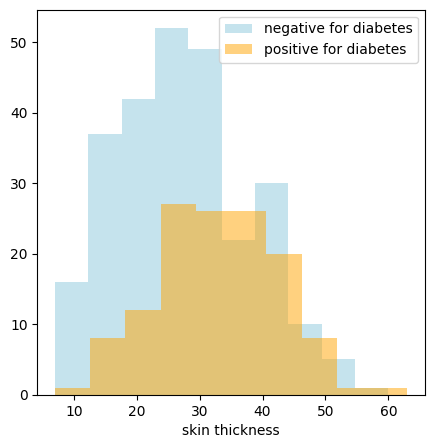

In [309]:
# Histograms of skin thickness for both outcomes

plt.figure(figsize=(5,5))

plt.hist(negative_outcome['SkinThickness'], alpha=0.7, color='lightblue', label='negative for diabetes')
plt.hist(positive_outcome['SkinThickness'], alpha=0.5, color='orange', label='positive for diabetes')

plt.xlabel('skin thickness')

plt.legend()

plt.show()

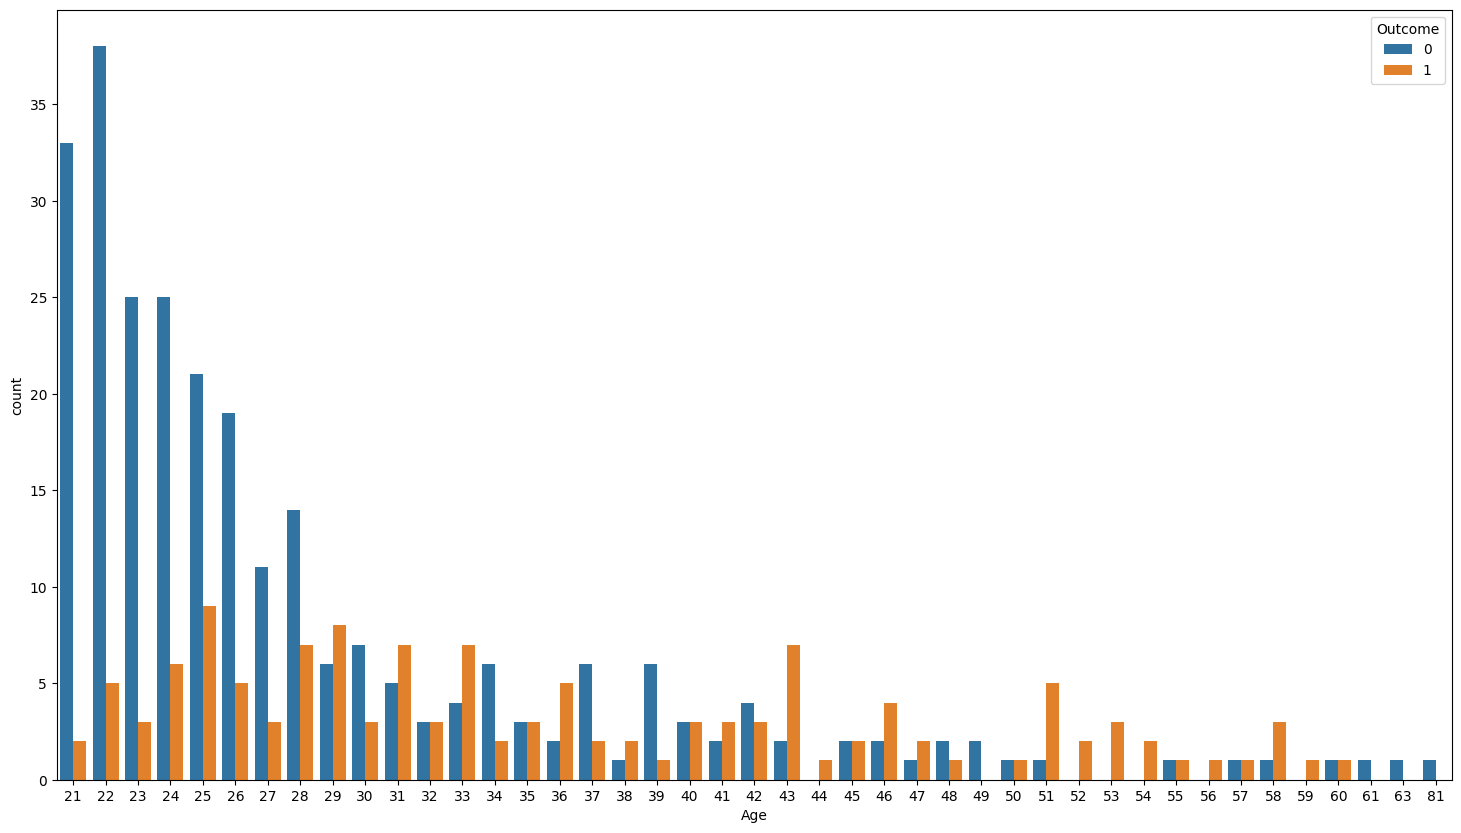

In [310]:
# Countplot of age and outcome

plt.figure(figsize=(18,10))

sns.countplot(data=data, x='Age', hue='Outcome')

plt.show()

<Axes: >

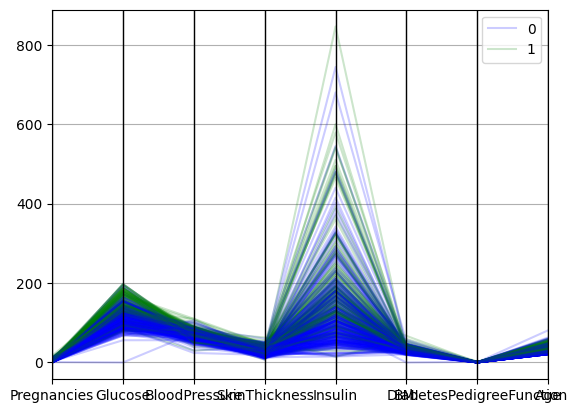

In [311]:
pd.plotting.parallel_coordinates(data, class_column='Outcome', color=('blue','green'), alpha=0.2)

In [312]:
# Creating lists for features and columns

features = data.columns.tolist()

features.remove('Outcome')

target = 'Outcome'

In [313]:
# Splitting dataset

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
640,0,102,86,17,105,29.3,0.695,27
365,5,99,54,28,83,34.0,0.499,30
341,1,95,74,21,73,25.9,0.673,36
134,2,96,68,13,49,21.1,0.647,26
659,3,80,82,31,70,34.2,1.292,27


In [314]:
# Initializing and training model

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

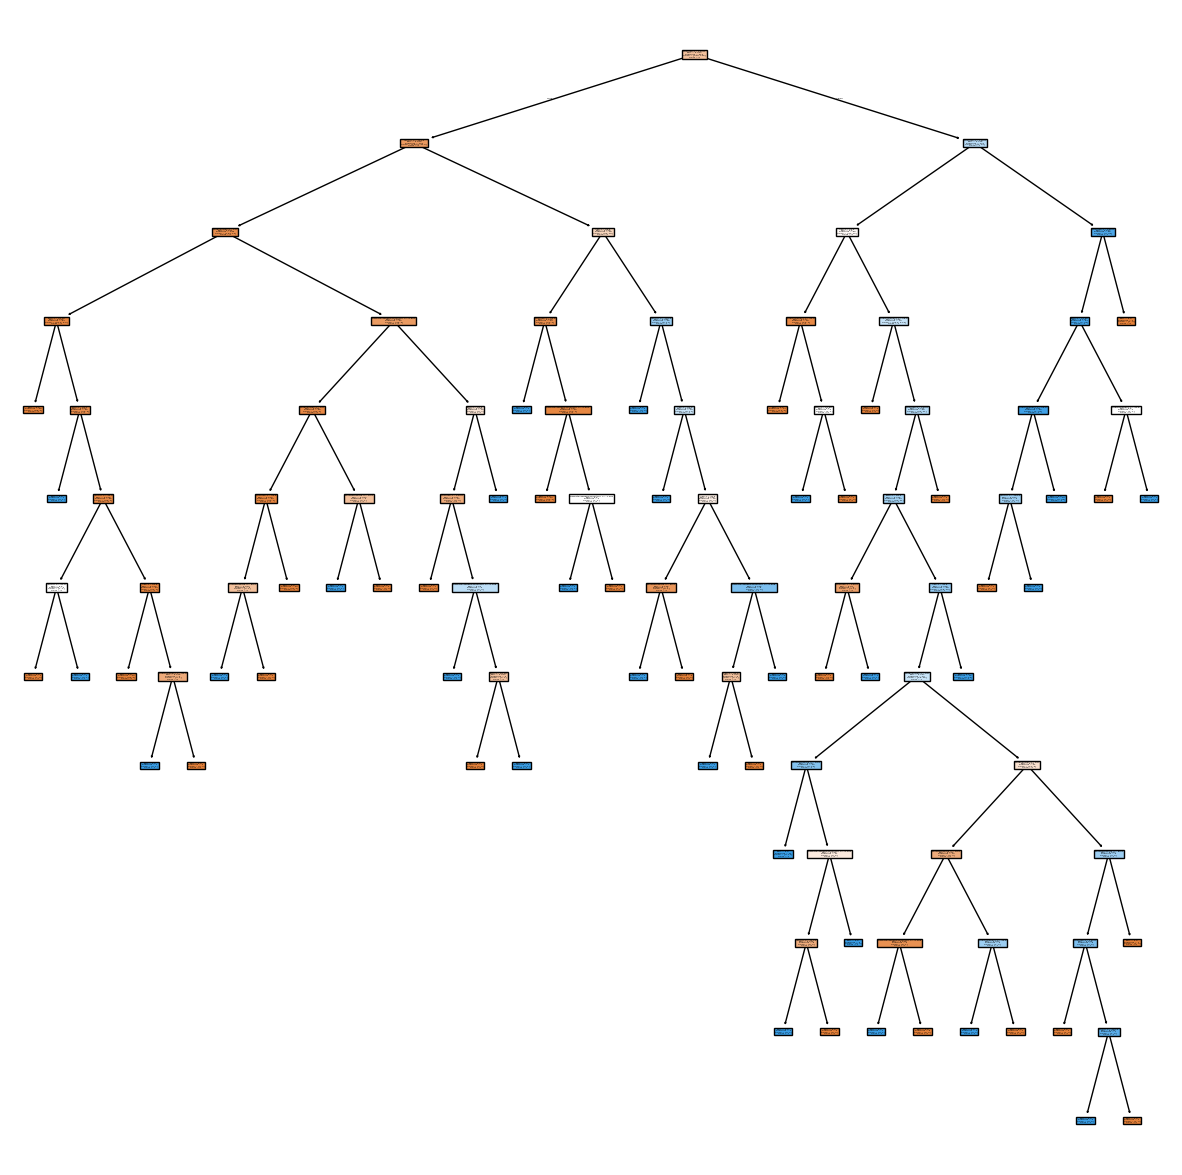

In [315]:
# Plotting trees

fit = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ['0','1'], filled=True)

plt.show()

In [316]:
# Evaluating model

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7215189873417721

Hyperparameter tuning

In [317]:
hyperparams = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 9]
}

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)

In [318]:
# Turning off warnings 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [319]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [320]:
# Fitting model with best hyperparameters

model_grid = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=9, min_samples_split=2, random_state=42)
model_grid.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=9, random_state=42)

In [321]:
# Evaluating optimized model

y_pred = model_grid.predict(X_test)

for k, v in {'Accuracy':accuracy_score, 'Precision':precision_score, 'Recall':recall_score, 'F1':f1_score}.items():
    print(f'{k}:{v(y_test, y_pred)}')

Accuracy:0.8227848101265823
Precision:0.7391304347826086
Recall:0.68
F1:0.7083333333333334


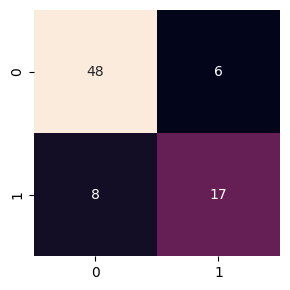

In [322]:
# Confusion matrix

diabetes_cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(diabetes_cm)

plt.figure(figsize=(3,3))

sns.heatmap(cm_df, annot=True, fmt='d', cbar=False)

plt.tight_layout()
plt.show()

In [323]:
# Some intermediate tests showed that the model worked better with SkinThickness dropped entirely and max_depth as 5. Creating this model.

X_train = X_train.drop('SkinThickness', axis=1)
X_test = X_test.drop('SkinThickness', axis=1)

model_opt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=9, min_samples_split=2, random_state=42)
model_opt.fit(X_train, y_train)

y_pred_opt = model_opt.predict(X_test)

for k, v in {'Accuracy':accuracy_score, 'Precision':precision_score, 'Recall':recall_score, 'F1':f1_score}.items():
    print(f'{k}:{v(y_test, y_pred_opt)}')

Accuracy:0.8481012658227848
Precision:0.7407407407407407
Recall:0.8
F1:0.7692307692307693


In [324]:
# Saving the model

dump(model, open('diabetes_decision_tree.sav', 'wb'))

In [325]:
# Accesing features of X_train to use as columns in test run in other tab

X_train.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']